## Cosine Similarity Calculations
Cosine similarity is a measure of similarity between two non-zero vectors of an inner product space that measures the cosine of the angle between them. Similarity measures have a multiude of uses in machine learning projects; they come in handy when matching strings, measuring distance, and extracting features. This similarity measurement is particularly concerned with orientation, rather than magnitude. 
In this case study, you'll use the cosine similarity to compare both a numeric data within a plane and a text dataset for string matching.

Load the Python modules, including cosine_similarity, from sklearn.metrics.pairwise

In [78]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
%matplotlib inline
plt.style.use('ggplot')
from scipy import spatial
from sklearn.metrics.pairwise import cosine_similarity

**<font color='teal'> Load the distance dataset into a dataframe. </font>**

In [79]:
distance = pd.read_csv('distance_dataset.csv')
print(distance.info(), distance.describe(), distance.head(), sep='\n\n\n\n')
distance.drop('Unnamed: 0', inplace=True, axis=1)
distance.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  2000 non-null   int64  
 1   X           2000 non-null   float64
 2   Y           2000 non-null   float64
 3   Z           2000 non-null   float64
 4   ClusterID   2000 non-null   int64  
dtypes: float64(3), int64(2)
memory usage: 78.2 KB
None



        Unnamed: 0            X            Y            Z    ClusterID
count  2000.000000  2000.000000  2000.000000  2000.000000  2000.000000
mean    999.500000     5.002561     5.032657     5.017639     3.000000
std     577.494589     1.935367     1.956047     1.957894     1.414567
min       0.000000     1.170533     1.350509     1.015867     1.000000
25%     499.750000     4.544975     3.704038     3.790899     2.000000
50%     999.500000     4.998504     5.081169     5.015852     3.000000
75%    1499.250000     5.457089     6.348823     6.

Index(['X', 'Y', 'Z', 'ClusterID'], dtype='object')

### Cosine Similarity with clusters and numeric matrices

All points in our dataset can be thought of as feature vectors. We illustrate it here as we display the __Cosine Similarity__ between each feature vector in the YZ plane and the [5, 5] vector we chose as reference. The sklearn.metrics.pairwise module provides an efficient way to compute the __cosine_similarity__ for large arrays from which we can compute the similarity.

 **<font color='teal'> First, create a 2D and a 3D matrix from the dataframe. The 2D matrix should contain the 'Y' and 'Z' columns and the 3D matrix should contain the 'X','Y', and 'Z' columns.</font>**

In [80]:
d2 = distance[['Y', 'Z']].to_numpy()
d3 = distance[['X', 'Z', 'Z']].to_numpy()

Calculate the cosine similarity for those matrices with reference planes of 5,5 and 5,5,5. Then subtract those measures from 1 in new features.

In [81]:
simCosine3D = 1. - cosine_similarity(d3, [[5,5,5]], 'cosine')
simCosine = 1. - cosine_similarity(d2, [[5,5]], 'cosine')

Using the 2D matrix and the reference plane of (5,5) we can use a scatter plot to view the way the similarity is calculated using the Cosine angle.

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_9018/2763830307.py:12: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = plt.colorbar()


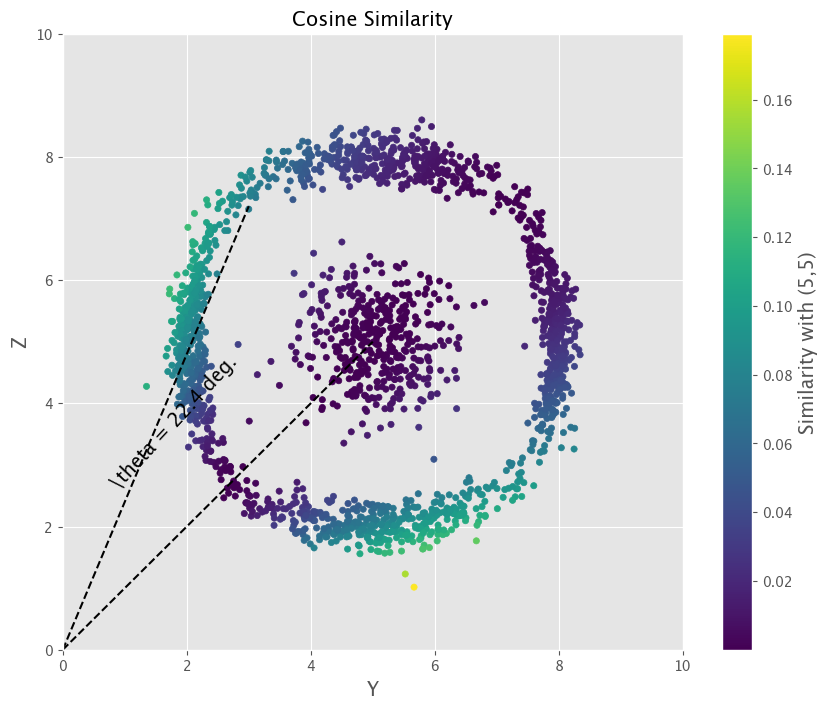

In [82]:
figCosine = plt.figure(figsize=[10,8])

plt.scatter(distance.Y, distance.Z, c=simCosine[:,0], s=20)
plt.plot([0,5],[0,5], '--', color='black')
plt.plot([0,3],[0,7.2], '--', color='black')
plt.text(0.7,2.6,r'\theta = 22.4 deg.', rotation=47, size=14)
plt.ylim([0,10])
plt.xlim([0,10])
plt.xlabel('Y', size=14)
plt.ylabel('Z', size=14)
plt.title('Cosine Similarity')
cb = plt.colorbar()
cb.set_label('Similarity with (5,5)', size=14)

#figCosine.savefig('similarity-cosine.png')

Now, plot the 3D matrix with the similarity and the reference plane, (5,5,5).

/var/folders/lc/nbgy6kvs4bzdy9cwsd9m4f600000gn/T/ipykernel_9018/4025393385.py:9: MatplotlibDeprecationWarning: Auto-removal of grids by pcolor() and pcolormesh() is deprecated since 3.5 and will be removed two minor releases later; please call grid(False) first.
  cb = figCosine3D.colorbar(p)


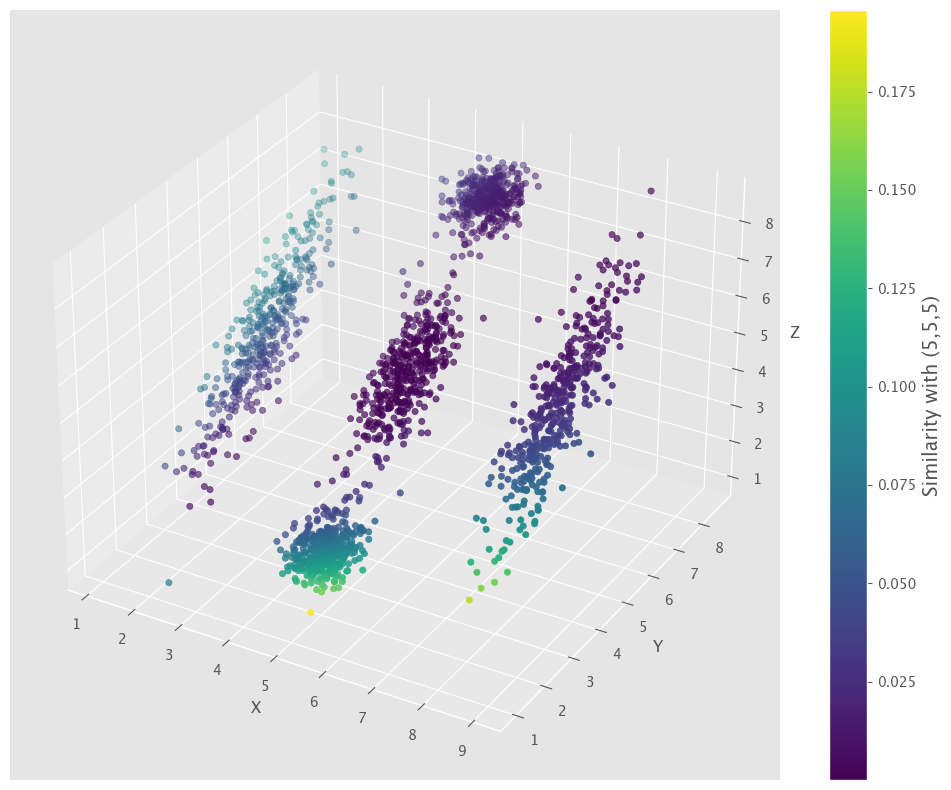

In [83]:
from mpl_toolkits.mplot3d import Axes3D
figCosine3D = plt.figure(figsize=(10, 8))
ax = figCosine3D.add_subplot(111, projection='3d')

p = ax.scatter(d3[:,0], d3[:,1], d3[:,2], c=simCosine3D[:,0])
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')
cb = figCosine3D.colorbar(p)
cb.set_label('Similarity with (5,5,5)', size=14)
                                   
figCosine3D.tight_layout()
#figCosine3D.savefig('cosine-3D.png', dpi=300, transparent=True)

----

### Cosine Similarity with text data
This is a quick example of how you can use Cosine Similarity to compare different text values or names for record matching or other natural language proecessing needs. 
First, we use count vectorizer to create a vector for each unique word in our Document 0 and Document 1. 

In [84]:
from sklearn.feature_extraction.text import CountVectorizer
count_vect = CountVectorizer()
Document1 = "Starbucks Coffee"
Document2 = "Essence of Coffee"

corpus = [Document1,Document2]

X_train_counts = count_vect.fit_transform(corpus)

pd.DataFrame(X_train_counts.toarray(), columns=count_vect.get_feature_names(), index=['Document 0','Document 1'])

/Users/jshensley/.conda/envs/DataScienceGuidedCapstone/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,coffee,essence,of,starbucks
Document 0,1,0,0,1
Document 1,1,1,1,0


Now, we use a common frequency tool called TF-IDF to convert the vectors to unique measures.

In [85]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer()
trsfm = vectorizer.fit_transform(corpus)
pd.DataFrame(trsfm.toarray(), columns=vectorizer.get_feature_names(), index=['Document 0','Document 1'])

/Users/jshensley/.conda/envs/DataScienceGuidedCapstone/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,coffee,essence,of,starbucks
Document 0,0.579739,0.000000,0.000000,0.814802
Document 1,0.449436,0.631667,0.631667,0.000000


Here, we finally apply the __Cosine Similarity__ measure to calculate how similar Document 0 is compared to any other document in the corpus. Therefore, the first value of 1 is showing that the Document 0 is 100% similar to Document 0 and 0.26055576 is the similarity measure between Document 0 and Document 1.

In [86]:
cosine_similarity(trsfm[0:1], trsfm)

array([[1.        , 0.26055567]])

Replace the current values for `Document 0` and `Document 1` with your own sentence or paragraph and apply the same steps as we did in the above example.

 **<font color='teal'> Combine the documents into a corpus.</font>**

In [87]:
my_doc_1 = "Es tiempo que vayamos al hospital para ver lo que ocurriera anoche con el bebe y sus espasmos"
my_doc_2 = "Es tiempo que se vayan al hospital y por que no lleven el bebe en caso de que tenga espasmos"
my_corpus = [my_doc_1, my_doc_2]
XX_train_counts = count_vect.fit_transform(my_corpus)

pd.DataFrame(XX_train_counts.toarray(), columns=count_vect.get_feature_names(), index=['Document 0','Document 1'])

/Users/jshensley/.conda/envs/DataScienceGuidedCapstone/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,al,anoche,bebe,caso,con,de,el,en,es,espasmos,...,para,por,que,se,sus,tenga,tiempo,vayamos,vayan,ver
Document 0,1,1,1,0,1,0,1,0,1,1,...,1,0,2,0,1,0,1,1,0,1
Document 1,1,0,1,1,0,1,1,1,1,1,...,0,1,3,1,0,1,1,0,1,0


 **<font color='teal'> Apply the count vectorizer to the corpus to transform it into vectors.</font>**

In [88]:
tenderizer = TfidfVectorizer()
meat_clever = tenderizer.fit_transform(my_corpus)
pd.DataFrame(meat_clever.toarray(), columns=tenderizer.get_feature_names(), index=['Document 0','Document 1'])

/Users/jshensley/.conda/envs/DataScienceGuidedCapstone/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


,al,anoche,bebe,caso,con,de,el,en,es,espasmos,...,para,por,que,se,sus,tenga,tiempo,vayamos,vayan,ver
Document 0,0.193157,0.271476,0.193157,0.000000,0.271476,0.000000,0.193157,0.000000,0.193157,0.193157,...,0.271476,0.000000,0.386315,0.000000,0.271476,0.000000,0.193157,0.271476,0.000000,0.271476
Document 1,0.172061,0.000000,0.172061,0.241826,0.000000,0.241826,0.172061,0.241826,0.172061,0.172061,...,0.000000,0.241826,0.516184,0.241826,0.000000,0.241826,0.172061,0.000000,0.241826,0.000000


 **<font color='teal'> Convert the vector counts to a dataframe with Pandas.</font>**

In [89]:
cosine_similarity(meat_clever[0:1], meat_clever)

array([[1.       , 0.4320535]])